In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
rawGoogleSearchDataPath = "googlesearchraw.csv"
searchData = pd.read_csv(rawGoogleSearchDataPath, sep=',',header=None)
data=searchData.values
data=data.T

In [13]:
#remove symptoms with less than 50% fill across regions
R=0.50
symptomsStart = (1,8)

totalSymp= data.shape[0] - symptomsStart[1]
symptomsFillRatio = np.zeros(totalSymp)

index = 0
for y in data[symptomsStart[1]:]:
    #print(y)
    count = 0 
    total = y.size - symptomsStart[0]
    for x in y[symptomsStart[0]:]:
        #print(x)
        if not isinstance(x, np.float): 
            count=count+1 
    ratio = count/total
    symptomsFillRatio[index] = ratio
    index=index+1

In [14]:
usefulSymptoms = []

index = 0
for r in symptomsFillRatio:
    #print(r)
    if r>R: 
        usefulSymptoms.append(data[:][symptomsStart[1]+index])
    #print(y)
    index=index+1
    
usefulSymptoms.insert(0, data[:][0]) #insert region
usefulSymptoms.insert(1, data[:][7]) #insert date
for r in usefulSymptoms:
    print(r[0])


open_covid_region_code
date
symptom:Allergic conjunctivitis
symptom:Angular cheilitis
symptom:Aphonia
symptom:Auditory hallucination
symptom:Burning Chest Pain
symptom:Clouding of consciousness
symptom:Crackles
symptom:Crepitus
symptom:Depersonalization
symptom:Dysautonomia
symptom:Epiphora
symptom:Hemolysis
symptom:Laryngitis
symptom:Myoclonus
symptom:Nasal polyp
symptom:Polydipsia
symptom:Pulmonary edema
symptom:Rectal pain
symptom:Rumination
symptom:Shallow breathing
symptom:Stridor
symptom:Urinary urgency
symptom:Ventricular fibrillation
symptom:Viral pneumonia


## Regions Filtering

In [15]:
R = 0.40

#print(len(usefulSymptoms[0]))

totalReg = len(usefulSymptoms[0]) - symptomsStart[0]
regionFillRatio = np.zeros(totalReg)


usefulRegions = np.array(usefulSymptoms).T

index = 0 
for y in usefulRegions[1:]:
    count = 0 
    total = y.size - 2
    #print(total)
    for x in y[2:]:
        #print(x)
        if not isinstance(x, np.float): 
            count=count+1 
    #print(count)
    ratio = count/total
    #print(count)
    regionFillRatio[index] = ratio
    index = index+1

print(usefulRegions[624])

['US-WY' '2020-09-28' nan nan nan '2.6' nan '3.26' '3.37' nan '3.32'
 '4.31' '2.93' '2.6' '3.82' nan '2.71' '2.32' nan nan nan nan '2.65' nan
 '3.37' nan]


In [16]:
usefulSymptomsOutput = []

index=1
regionAverage=np.zeros(16)
blockCount=0
blockTotal=0
for r in regionFillRatio:    
    if index%39==0:
        regionAverage[blockCount] = blockTotal/39
        blockCount=blockCount+1
        blockTotal=0 
    blockTotal= blockTotal+r
    index=index+1

blockCount = 0 
for avg in regionAverage:
    if avg>R:
        for stateWeek in usefulRegions[blockCount*39+1:39+blockCount*39+1]:
            usefulSymptomsOutput.append(stateWeek);
    blockCount=blockCount+1

finalDataSet1 = np.asarray(usefulSymptomsOutput)
print(finalDataSet1)  #[stateWeek: 0-506][symptom 2-25 (state = 0, date=1)]

[['US-AK' '2020-01-06' nan ... nan '9.91' nan]
 ['US-AK' '2020-01-13' nan ... '7.65' '8.41' nan]
 ['US-AK' '2020-01-20' nan ... '7.54' '16.19' nan]
 ...
 ['US-WY' '2020-09-14' nan ... '2.68' nan nan]
 ['US-WY' '2020-09-21' nan ... nan '3.23' nan]
 ['US-WY' '2020-09-28' nan ... nan '3.37' nan]]


In [17]:
availableStates = []
for stateWeek in finalDataSet1:
    if stateWeek[0] not in availableStates:
        availableStates.append(stateWeek[0])

print(availableStates)

['US-AK', 'US-DC', 'US-DE', 'US-ME', 'US-MT', 'US-ND', 'US-NH', 'US-RI', 'US-SD', 'US-VT', 'US-WV', 'US-WY']


In [18]:
rawHospitalisationDataPath = "hospitalizationraw.csv"
hospData = pd.read_csv(rawHospitalisationDataPath, sep=',',header=None)
data=hospData.values


In [19]:
index = 0
hospDataClean = []
for y in data:
    #if index == 0: print(y)
    if y[0] in availableStates:
        hospDataClean.append(y)
    index=index+1
    
hospDataCleanArr = np.asarray(hospDataClean)
            

## Filtering Columns

In [20]:
transHospData = hospDataCleanArr.T

finalHospData = []

finalHospData.append(transHospData[0])
finalHospData.append(transHospData[2])
finalHospData.append(transHospData[17])
finalHospData.append(transHospData[18])

transFinalHospData = np.asarray(finalHospData).T

# finds states that have cumulative cases > 0
availableStates = []
for stateDay in transFinalHospData:
    if stateDay[1] == '2020-10-08' and stateDay[3] > 0:
        availableStates.append(stateDay[0])

filteredHospDataByAvailableStates = []
for stateDay in transFinalHospData:
    if stateDay[0] in availableStates:
        filteredHospDataByAvailableStates.append(stateDay)
        
print(filteredHospDataByAvailableStates)


[array(['US-WY', '2020-03-07', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-08', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-09', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-10', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-11', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-12', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-13', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-14', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-15', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-16', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-17', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-18', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-19', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-20', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-21', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-22', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-23', 0.0, 0.0], dtype=object), array(['US-WY', '2020-03-24', 0.0, 0.0], dtype=

In [21]:
#bring hospitalization data to weekly resolution starting from 03-30

weeklyHospData = []

currentState = ''
currentWeek = ''
dayCount = 0
hospitalizations = 0

for stateDay in filteredHospDataByAvailableStates:
    currentState = stateDay[0]
    
    if(stateDay[1] >= '2020-03-30' and stateDay[1] <= '2020-10-04'):
        dayCount = dayCount + 1
            
        if(dayCount == 1):
            currentWeek = stateDay[1]
        
        hospitalizations = hospitalizations + stateDay[2]
        
        if(dayCount == 7):
            if(hospitalizations > 0):
                weeklyHospData.append([currentState, currentWeek, hospitalizations])
            else:
                weeklyHospData.append([currentState, currentWeek, 0])
            dayCount = 0
            hospitalizations = 0

finalDataSet2 = weeklyHospData;
print(finalDataSet2)
        

[['US-WY', '2020-03-30', 8.0], ['US-WY', '2020-04-06', 17.0], ['US-WY', '2020-04-13', 10.0], ['US-WY', '2020-04-20', 4.0], ['US-WY', '2020-04-27', 6.0], ['US-WY', '2020-05-04', 5.0], ['US-WY', '2020-05-11', 5.0], ['US-WY', '2020-05-18', 8.0], ['US-WY', '2020-05-25', 7.0], ['US-WY', '2020-06-01', 5.0], ['US-WY', '2020-06-08', 3.0], ['US-WY', '2020-06-15', 7.0], ['US-WY', '2020-06-22', 12.0], ['US-WY', '2020-06-29', 7.0], ['US-WY', '2020-07-06', 5.0], ['US-WY', '2020-07-13', 19.0], ['US-WY', '2020-07-20', 15.0], ['US-WY', '2020-07-27', 9.0], ['US-WY', '2020-08-03', 10.0], ['US-WY', '2020-08-10', 14.0], ['US-WY', '2020-08-17', 16.0], ['US-WY', '2020-08-24', 8.0], ['US-WY', '2020-08-31', 4.0], ['US-WY', '2020-09-07', 9.0], ['US-WY', '2020-09-14', 15.0], ['US-WY', '2020-09-21', 19.0], ['US-WY', '2020-09-28', 20.0], ['US-SD', '2020-03-30', 22.0], ['US-SD', '2020-04-06', 21.0], ['US-SD', '2020-04-13', 31.0], ['US-SD', '2020-04-20', 61.0], ['US-SD', '2020-04-27', 62.0], ['US-SD', '2020-05-04',

In [22]:
#merge dataset 1 and dataset 2

mergedDataset = []

for symptomEntry in finalDataSet1:
    for hospEntry in finalDataSet2:
        if(symptomEntry[0] == hospEntry[0] and symptomEntry[1] == hospEntry[1]):
            temp = symptomEntry.tolist()
            temp.append(hospEntry[2])
            mergedDataset.append(temp)
            
print(mergedDataset)

[['US-ME', '2020-03-30', '17.17', '11.92', '12.49', nan, '24.27', nan, '23.98', nan, nan, '15.47', nan, '20.86', '18.73', '17.6', nan, '18.73', nan, '14.19', nan, '30.79', '21.43', '16.18', '14.05', '27.96', 86.0], ['US-ME', '2020-04-06', '18.59', '13.76', '13.17', nan, '18.0', nan, '21.51', nan, nan, '13.03', nan, '21.51', '19.76', '19.76', nan, '17.71', nan, '18.0', nan, '25.17', '24.0', '12.44', '15.07', '19.61', 34.0], ['US-ME', '2020-04-13', '12.38', '19.78', '13.81', nan, '17.36', nan, '16.94', nan, nan, '16.94', nan, '20.78', '12.24', '22.91', nan, '16.94', nan, '15.23', nan, '21.63', '13.52', '17.51', '15.66', '16.08', 16.0], ['US-ME', '2020-04-20', '17.49', '18.08', '9.99', nan, '16.9', nan, '20.29', nan, nan, '18.23', nan, '19.84', '17.05', '19.99', nan, '14.11', nan, '18.82', nan, '20.29', '16.32', '17.05', '10.88', '11.76', 23.0], ['US-ME', '2020-04-27', '15.07', '16.65', '8.18', nan, '14.5', nan, '16.51', nan, nan, '18.23', nan, '19.67', '13.49', '17.08', nan, '16.51', nan

In [23]:
# normalize data using region-symptom median

for col in range(2, np.asarray(mergedDataset).shape[1] - 1):
    # median = 13 = 27 weeks per region -> divide by 2 -> round up -> subtract 1 (zero-indexed)
    medianIndex = 13
    weeksPerRegion = 27
    blockIndex = -1
    medianValue = -1
    for i, row in enumerate(mergedDataset):
        if i % weeksPerRegion == 0:
            blockIndex += 1
            
            values = []
            for week in mergedDataset[(blockIndex * weeksPerRegion):(blockIndex * weeksPerRegion)+weeksPerRegion]:
                values.append(week[col])
            
            sortValues = np.sort(values)
            medianValue = float(sortValues[medianIndex])
        
        row[col] = float(row[col])
        row[col] /= medianValue

In [24]:
labels = np.asarray(usefulSymptoms).T[0].tolist()
labels.append('hospitalizations')
mergedDataset.insert(0, labels)

#print(mergedDataset)

#export merged dataset as csv
df = pd.DataFrame(mergedDataset)
df.to_csv('mergedDataset.csv', index=False, header=False)

## Visualising data through plots

In [25]:
symps = []
for r in usefulSymptoms:
    symps.append(r[0])
symps.remove("open_covid_region_code")
symps.remove("date")    
print(symps)

['symptom:Allergic conjunctivitis', 'symptom:Angular cheilitis', 'symptom:Aphonia', 'symptom:Auditory hallucination', 'symptom:Burning Chest Pain', 'symptom:Clouding of consciousness', 'symptom:Crackles', 'symptom:Crepitus', 'symptom:Depersonalization', 'symptom:Dysautonomia', 'symptom:Epiphora', 'symptom:Hemolysis', 'symptom:Laryngitis', 'symptom:Myoclonus', 'symptom:Nasal polyp', 'symptom:Polydipsia', 'symptom:Pulmonary edema', 'symptom:Rectal pain', 'symptom:Rumination', 'symptom:Shallow breathing', 'symptom:Stridor', 'symptom:Urinary urgency', 'symptom:Ventricular fibrillation', 'symptom:Viral pneumonia']


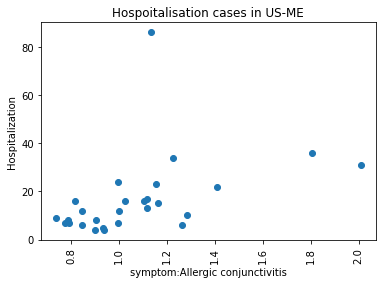

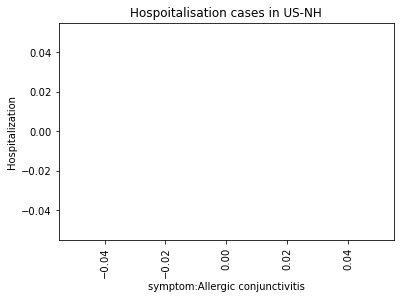

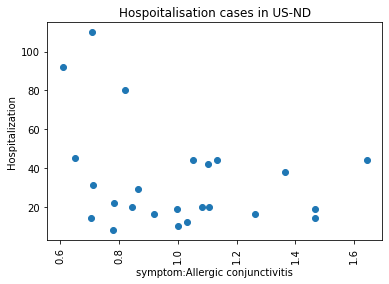

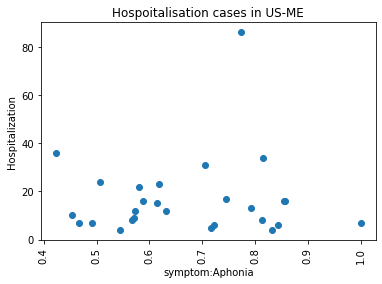

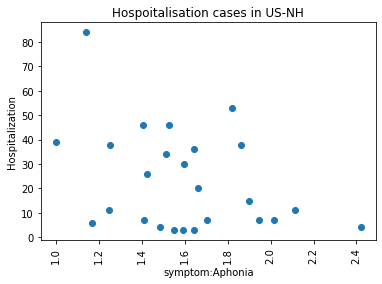

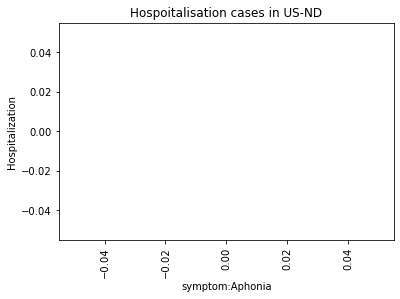

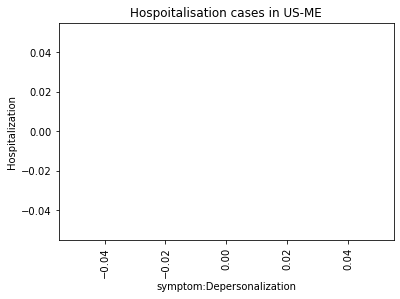

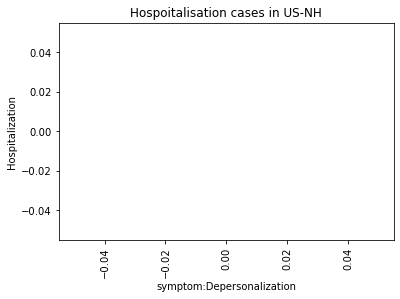

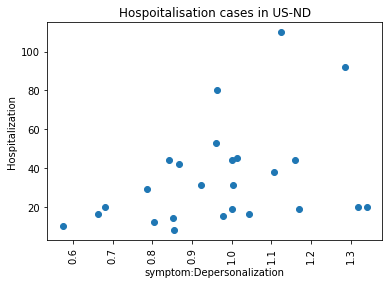

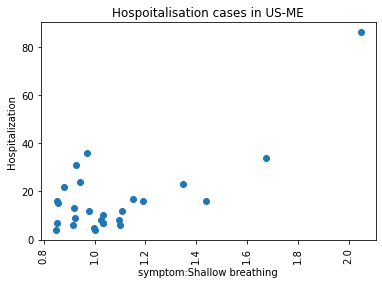

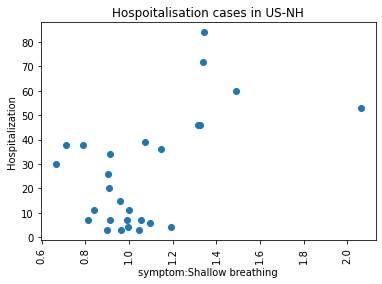

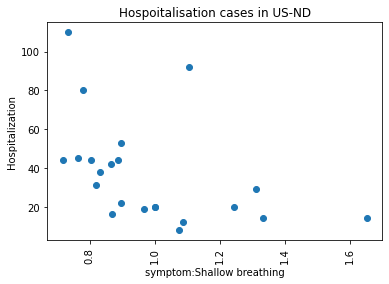

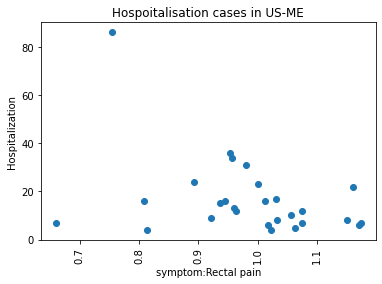

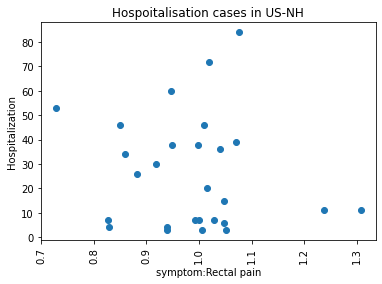

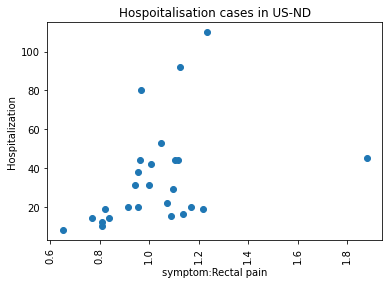

In [26]:

merged = np.array(mergedDataset)

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])

region = ([0,3,2])
firstSymptomIndex = ([0,2,8,19,17])

for symp in firstSymptomIndex:
    for reg in region:
        x_train = merged[(reg*27+1):(reg*27+27+1), symp+ 2].astype(float)
        y_train = merged[(reg*27+1):(reg*27+27+1), 26].astype(float)

        plt.scatter(x_train, y_train, marker='o', label='train')
        plt.ylabel('Hospitalization')
        plt.xticks(rotation='vertical')
        plt.xlabel(symps[symp])
        plt.title(f"Hospoitalisation cases in {merged[reg*27+1, 0]}")
        plt.show()